# Metody inteligencji obliczeniowej - Sprawozdanie 6

## Ucenie nienadzorowane. Klasteryzajca.
### Yuliya Zviarko, 23.04.2025

# Wprowadzenie

Na poprzednich zajęciach mieliśmy styczność z **uczeniem nadzorowanym**, którego zasada działania polegała na wykorzystywaniu zbioru danych etykietowanych do trenowania algorytmów. Stosowaliśmy je na przykład w sytuacjach, gdy model uczył się na podstawie danych wejściowych i odpowiadających im etykiet - takim zadaniem było na przykład klasyfikowanie ubrań na podstawie ich cech i przypisanych do nich konkretnych etykiet.

Tym razem przeszliśmy do nieco innej formy uczenia maszynowego - **uczenia nienadzorowanego**. Działa ono na danych nieetykietowanych, grupując je i analizując w celu wykrywania wzorców.
Uczenie nadzorowane wykorzystuje dane etykietowane do trenowania modeli, natomiast uczenie nienadzorowane analizuje dane nieetykietowane w celu odkrycia ukrytych wzorców.

# Zadanie 1
W zadaniu pierwszym mieliśmy przygotowany zbiór - customers_mall.csv, zawierający informacje o klientach pewnego centrum handlowego. Pierwsza kolumna przedstawiała ich zarobki (w tysiącach), w drugiej zaś znajdowała się punktowa ocena wydatków (od 0 do 100) każdego z klientów. Celem było użycie algorytmu k-means podczas wykonywania klasteryzacji. Uzyskane wyniki należało ocenić i opisać, równocześnie należało zarekomendować odpowiednią ilość klastrów.

Zadanie zaczęłam standardowo od przygotowania zbioru danych. Kolejnym krokiem była ich standaryzacja.

Na razie nie wiedziałam dokładnie, jaką liczbę klastrów chciałabym zaproponować - zatem wybrałam przedział, który będziemy badać w trakcie eksperymentu, zaproponowany w kodzie od 2 do 6.
Na końcu zdefiniowałam krotki - które będą przechowywały metryki dla różnej ilości klastrów - to będzie niezbędne w trakcie analizy najlepszej liczby klastrów.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

data = pd.read_csv('customers_mall.csv', sep=';')
print(data)

# standaryzacja danych
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# zaproponowany zakres liczby klastrów do przetestowania (od 2 do 6)
range_n_clusters = range(2, 7)

silhouette_scores = [] # współczynniki silhouette
calinski_scores = []   # indeksy Calińskiego-Harabasza
davies_scores = []     # indeksy Daviesa-Bouldina

     Annual Income  Spending Score
0               15              39
1               15              81
2               16               6
3               16              77
4               17               4
..             ...             ...
195            120              79
196            126              28
197            126              74
198            137              18
199            137              83

[200 rows x 2 columns]


W tym zadaniu, jak było powiedziane wyżej, stosowano algorytm k-średnich. Celem tego algorytmu jest podział danych wejściowych na z góry założoną liczbę klas.
Algorytm działa w kilku etapach:

1) Wybór ilości centroidów i początkowe ułożenie ich w przestrzeni. Następnie w przestrzeni umieszcza się zadaną ilość punktów. Ich sposób ma bardzo ważne znaczenie i od tego zależy wynik końcowy działania algorytmu.

2) Następnie ustala się przynależność punktów do naniesionych centroidów. W tym kroku wyliczane są średnie odległości poszczególnych punktów i przypisujemy je najbliższym centroidom - to może być przypisanie koloru.

3) Aktualizacja położenia naszych centroidów. Nowe współrzędne centroidów to średnia arytmetyczna współrzędnych wszystkich punktów należących do jego grupy.

Krok drugi i trzeci powtarzamy aż do osiągnięcia kryterium zbieżności, którym najczęściej jest stan, w którym nie zmieniła się przynależność punktów do klas.

Na szczęście ręcznie tego definiować nie musimy. Dla tego z biblioteki sklearn importujemy KMeans.
Do tego zdefiniowałam pętlę, w której iterujemy po każdej liczbie klastrów. Następnie uruchamiamy algorytm kmeans i wyliczamy dla konkretnego wyniku metryki. Zapisujemy je do krotek.

Na koniec, żeby łatwiej było analizować wyniki, zrobiłam wykresy porównawcze: wykresy grupowania punktów w zależności od liczby użytych klastrów oraz wykres zależności ilości klastrów od badanej metryki.

=== 2 klastry ===
Silhouette Score: 0.381
Calinski-Harabasz Index: 96.370
Davies-Bouldin Index: 1.051

=== 3 klastry ===
Silhouette Score: 0.391
Calinski-Harabasz Index: 114.788
Davies-Bouldin Index: 0.832

=== 4 klastry ===
Silhouette Score: 0.486
Calinski-Harabasz Index: 179.524
Davies-Bouldin Index: 0.722

=== 5 klastry ===
Silhouette Score: 0.541
Calinski-Harabasz Index: 237.051
Davies-Bouldin Index: 0.578

=== 6 klastry ===
Silhouette Score: 0.524
Calinski-Harabasz Index: 241.390
Davies-Bouldin Index: 0.651



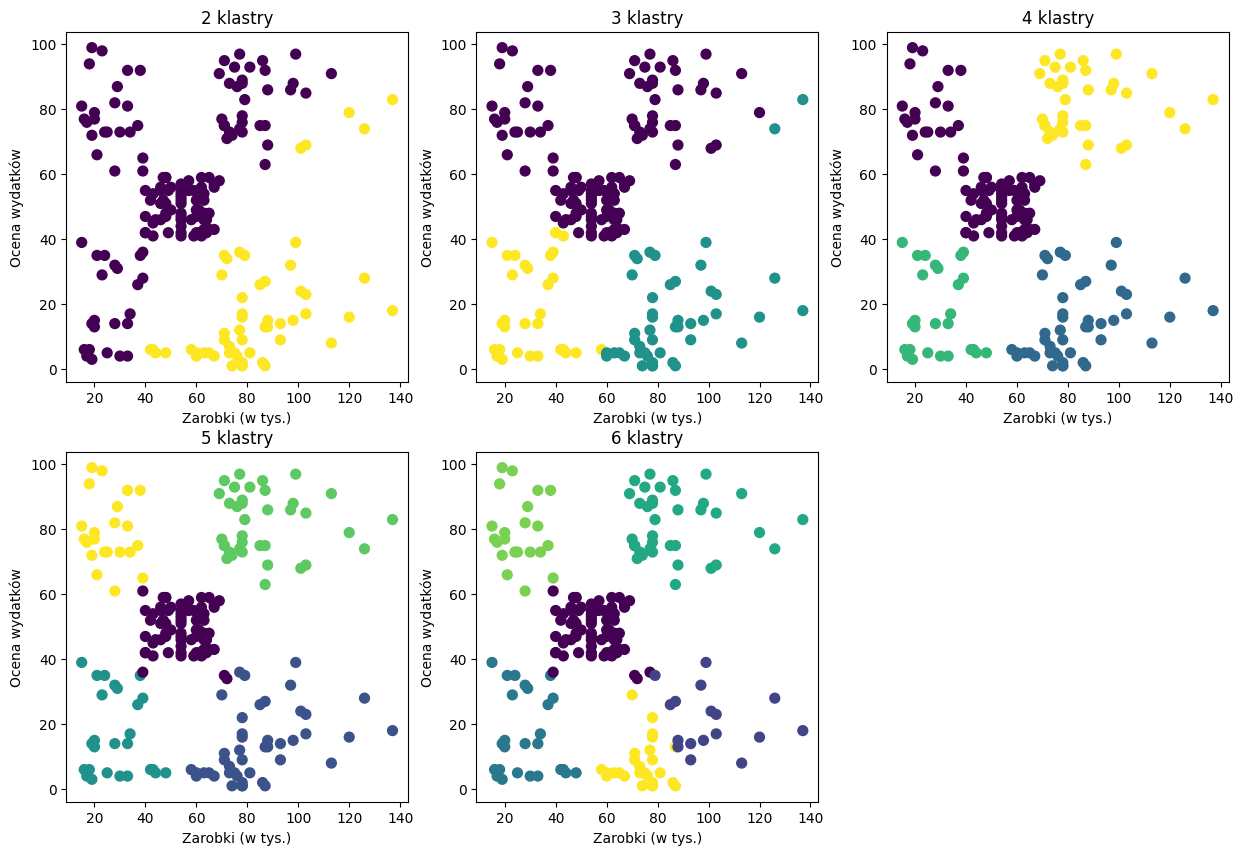

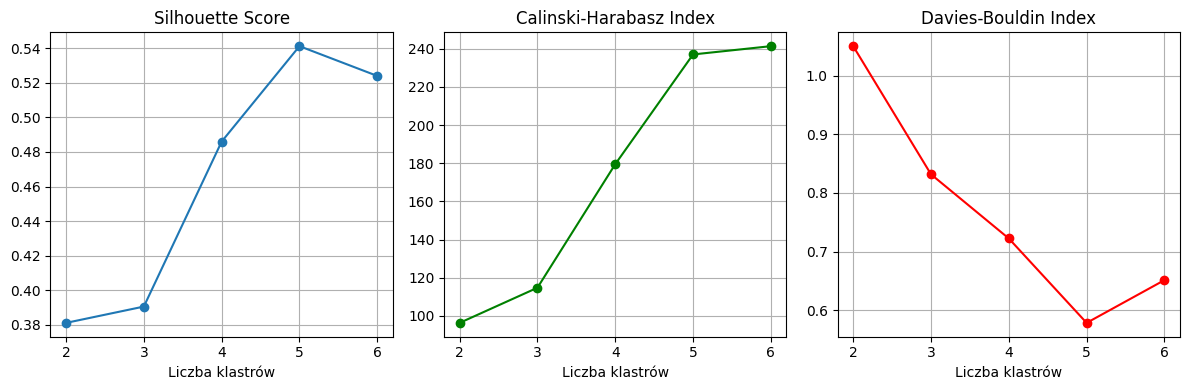

In [21]:
# Pętla po liczbie klastrów
plt.figure(figsize=(15, 10))
for i, n_clusters in enumerate(range_n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_scaled)

    silhouette = metrics.silhouette_score(data_scaled, labels)
    calinski = metrics.calinski_harabasz_score(data_scaled, labels)
    davies = metrics.davies_bouldin_score(data_scaled, labels)

    silhouette_scores.append(silhouette)
    calinski_scores.append(calinski)
    davies_scores.append(davies)

    print(f'=== {n_clusters} klastry ===')
    print(f'Silhouette Score: {silhouette:.3f}')
    print(f'Calinski-Harabasz Index: {calinski:.3f}')
    print(f'Davies-Bouldin Index: {davies:.3f}')
    print()

    plt.subplot(2, 3, i+1)
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f'{n_clusters} klastry')
    plt.xlabel('Zarobki (w tys.)')
    plt.ylabel('Ocena wydatków')


plt.figure(figsize=(12, 4))

# Sillhoutte
plt.subplot(1, 3, 1)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Liczba klastrów')
plt.grid(True)

# Indeks Carabasza-Halińskiego
plt.subplot(1, 3, 2)
plt.plot(range_n_clusters, calinski_scores, marker='o', color='green')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Liczba klastrów')
plt.grid(True)

# Indeks Randa
plt.subplot(1, 3, 3)
plt.plot(range_n_clusters, davies_scores, marker='o', color='red')
plt.title('Davies-Bouldin Index')
plt.xlabel('Liczba klastrów')
plt.grid(True)

plt.tight_layout()
plt.show()

Analizując otrzymane wykresy metryk, moim zdaniem satysfakcjonującym jest użycie 5 klastrów.

Ponieważ współczynnik Silhouette, który mieści się w przedziale od -1 do 1, gdzie interesuje nas osiągnięcie wartości jak najbliższej jedynki - co oznacza że obserwacje jednego klastra znajdują się daleko od sąsiednich klastrów. W danym przypadku mamy wartość ~0.54.

Wartości CHI mieszczą się w zakresie od zera (asymptotycznie), do plus nieskończoności, a większe wartości oznaczają lepszą klasteryzację. Dla 5 klastrów osiągamy wystarczająco wysoki wynik - prawie 240, jest to wyższy wynik niż dla mniejszych klastrów i to o wiele, chociaż dla 6 klastrów wynik mało, ale lekko się poprawia jeszcze w wyższą stronę.

Dla Davies-Bouldin minimum to zero, i im niższa wartość tym lepiej. Dla 5 ten wynik jest najlepszy - jest poniżej 0.6.

Wszystkie metryki potwierdzają stwierdzenie tego, że 5 klastrów jest optymalnym wyborem dla takiego zbioru danych. Również jeśli zobaczymy na kolorowanie punktów - nawet na oko widać, że wyróżniają się osobne 5 wzorców, które teraz przy użyciu 5 klastrów są podzielone osobno od siebie i trzymają się tylko swoich granic. Również nie ma przepełnienia grup jak dla przypadku 6 klastrów, co już jest za "too much" :)

# Zadanie 2
Z kolei w zadaniu drugim mieliśmy styczność ze zbiorem planets.csv, gdzie znajduje się zbiór 778 spośród ponad 5000 znanych egzoplanet (planet pozasłonecznych) pozyskany z bazy danych NASA (https://exoplanetarchive.ipac.caltech.edu/index.html).

         pl_name:        Planet Name,
         pl_orbper:      Orbital Period [days]',
         pl_orbsmax:     Orbit Semi-Major Axis [au]),
         pl_rade:        Planet Radius [Earth Radius],
         pl_masse:       Planet Mass [Earth Mass],
         pl_orbeccen:    Eccentricity,
         pl_eqt:         Equilibrium Temperature [K],
         st_teff:        Stellar Effective Temperature [K],
         st_mass:        Stellar Mass [Solar mass],
         sy_dist:        Distance [pc]


 Należało dokonać klasteryzacji kilkoma sposobami, ocenić wyniki za pomocą metryk, wybrać dowolny z wyników i przeanalizować jego rezultaty (czym charakteryzują się klastry).

## Algorytm k-means

Na początku pobrałam zbiór i celem było jego wyczyszczenie z tych planet, w których brakowało jakichkolwiek danych w jednej lub więcej kolumnach. Na wszelki wypadek wypisałam, ile planet pozostało po czyszczeniu, żeby zobaczyć, czy ich liczba zmalała - to pomoże pracować na czystym zbiorze danych.


Po tych operacjach wybrałem tylko kolumny numeryczne do klasteryzacji. Dane zostały następnie standaryzowane.

In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score
import matplotlib.pyplot as plt

data = pd.read_csv('planets.csv')
data_cleaned = data.replace(0, np.nan).dropna()
print(f"Liczba planet przed czyszczeniem: {len(data)}")
data_cleaned = data.replace(0, np.nan).dropna()
print(f"Liczba planet po czyszczeniu: {len(data_cleaned)}")

print(data_cleaned)

# wybór tylko kolumn numerycznych do klasteryzacji
numeric_cols = ['pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_masse',
                'pl_orbeccen', 'pl_eqt', 'st_teff', 'st_mass', 'sy_dist']
X = data_cleaned[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Liczba planet przed czyszczeniem: 778
Liczba planet po czyszczeniu: 452
             pl_name  pl_orbper  pl_orbsmax  pl_rade    pl_masse  pl_orbeccen  \
0           55 Cnc e   0.736544     0.01544    2.080     7.81000        0.061   
4         CoRoT-10 b  13.240600     0.10550   10.870   874.00000        0.530   
6         CoRoT-12 b   2.828042     0.04016   16.140   291.43800        0.070   
10        CoRoT-18 b   1.900069     0.02950   14.680  1102.82000        0.080   
11        CoRoT-19 b   3.897130     0.05180   14.460   352.78000        0.047   
..               ...        ...         ...      ...         ...          ...   
769          WTS-1 b   3.352057     0.04700   16.700  1274.44000        0.100   
770  Wendelstein-1 b   2.663416     0.02820   11.561   188.15536        0.012   
771  Wendelstein-2 b   1.752224     0.02340   12.993   232.33373        0.057   
772       Wolf 503 b   6.001270     0.05706    2.043     6.26000        0.410   
775           XO-7 b   2.864142     0

Na początku korzystam z algorytmu k-średnich. Operacje prowadzę te same, co były wykonane w zadaniu 1, więc nie skupiam się zbytnio na krokach. Jest tylko jedna różnica - dodałem więcej klastrów - przedział od 2 do 10. Pozostałe zostało bez zmian:

tak samo iterowałam pętlą po klastrach, wyliczałam algorytmem jak punkty się grupują po kolorach, robiłam wykres zależności liczby klastrów od badanych metryk i wypisywałam je na ekran w postaci wykresu.

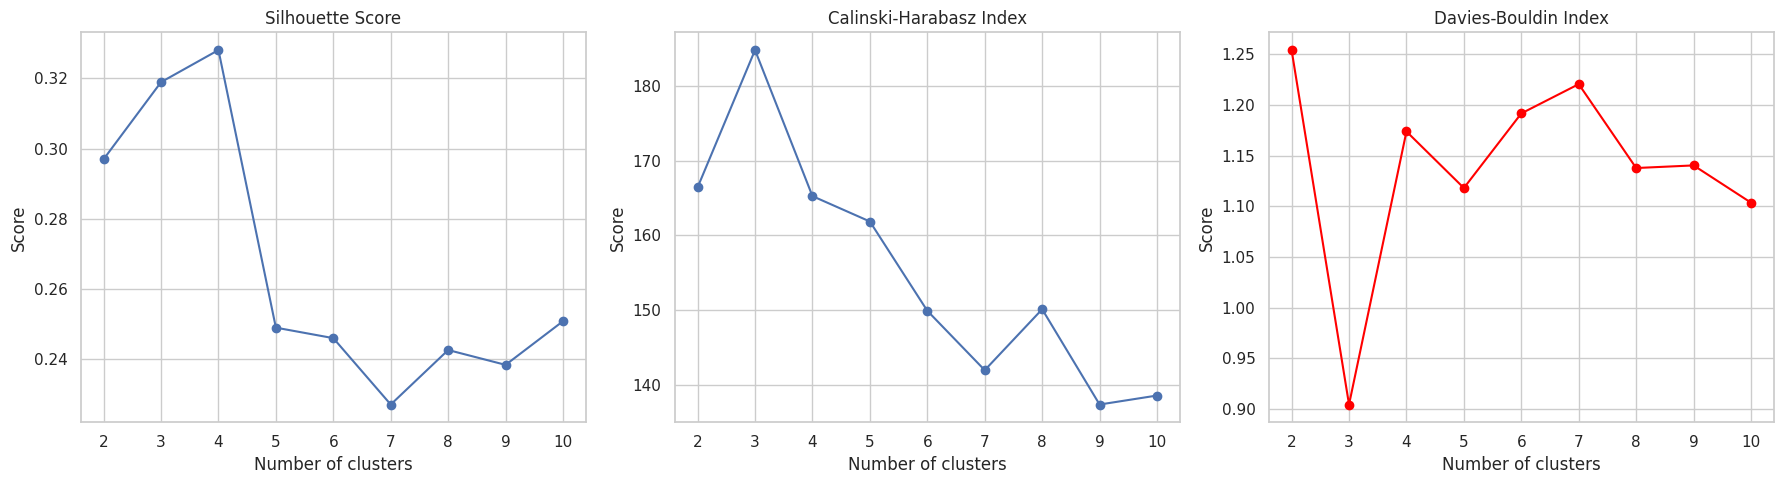

In [62]:
silhouette_scores = []
ch_scores = []
davies_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    silhouette_scores.append(metrics.silhouette_score(X_scaled, cluster_labels))
    ch_scores.append(metrics.calinski_harabasz_score(X_scaled, cluster_labels))
    davies_scores.append(metrics.davies_bouldin_score(X_scaled, cluster_labels))

plt.figure(figsize=(18, 5))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.grid(True)

# Calinski-Harabasz Index
plt.subplot(1, 3, 2)
plt.plot(range_n_clusters, ch_scores, marker='o')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.grid(True)

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(range_n_clusters, davies_scores, marker='o', color='red')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.grid(True)

plt.tight_layout()
plt.show()

Na podstawie uzyskanych wyników, wybór **3 klastrów** okazuje się najlepszą opcją. Dla tej liczby klastrów wartość metryki Silhouette osiąga jeden z najwyższych poziomów, indeks Calinskiego-Harabasza (CHI) przekracza wartość 180, co świadczy o wyraźnej separacji klastrów, a indeks Davies-Bouldina zbliża się do zera, co dodatkowo potwierdza dobre dopasowanie modelu.

Teraz, znając optymalną liczbę klastrów, należy przeanalizować ich charakterystykę. Problem polega na tym, że początkowy zbiór zawiera 778 planet z 9 różnymi właściwościami, co uniemożliwia bezpośrednie przedstawienie na wykresie.

Wykorzystałam analizę głównych składowych (PCA) - metodę redukcji wymiarów, która przekształca skorelowane zmienne w liniowo nieskorelowane składowe.

Dzięki temu 9 cech zostało zredukowanych do 2, co pozwoliło przedstawić planety jako punkty na płaszczyźnie, z kolorami odpowiadającymi przynależności do klastrów.

Dodatkowo użyłam boxplotów do pokazania rozkładu cech w poszczególnych klastrach, co pomogło zidentyfikować charakterystyczne parametry planet w każdej grupie.

Na koniec sprawdziłam liczbę planet przypisanych do każdego klastra.

           pl_orbper  pl_orbsmax    pl_rade    pl_masse  pl_orbeccen  \
cluster                                                                
0          17.356014    0.103060   4.506887   92.550999     0.121216   
1        1035.982923    1.978667  10.429667  600.695953     0.490000   
2          10.928558    0.081478  13.308065  634.052923     0.158516   

              pl_eqt      st_teff   st_mass     sy_dist  
cluster                                                  
0         726.848039  4670.201961  0.727157  127.426226  
1         198.000000  5409.000000  0.973333  581.826667  
2        1431.685714  5933.126531  1.174653  513.210013  


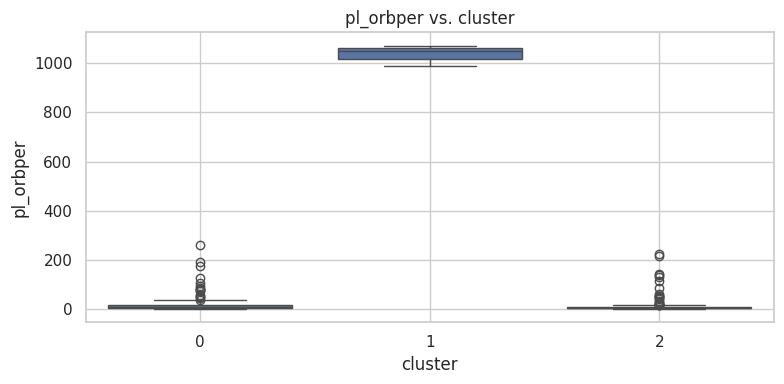

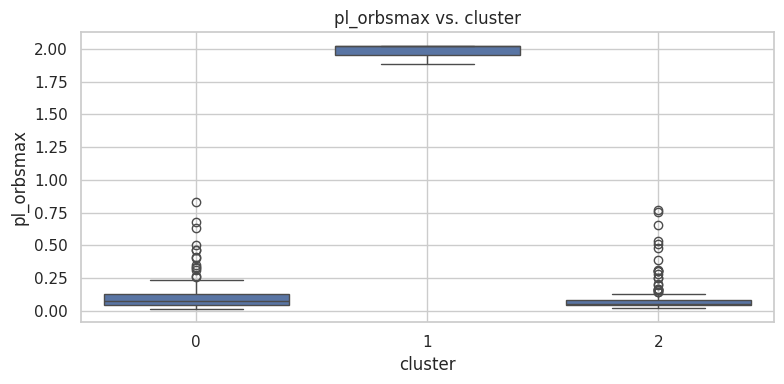

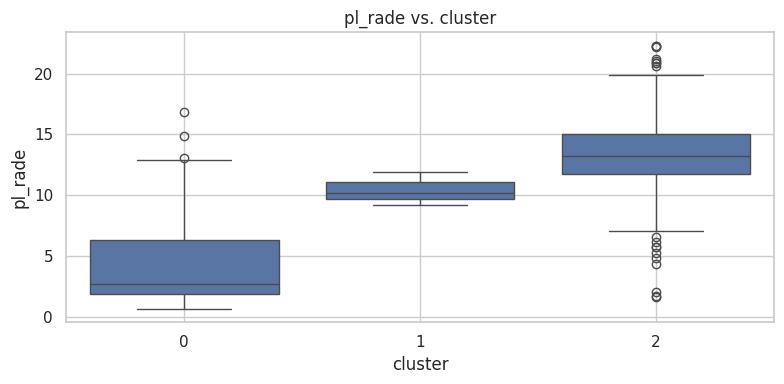

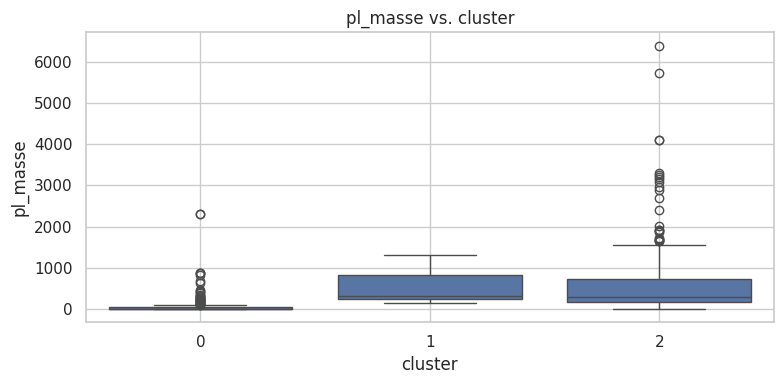

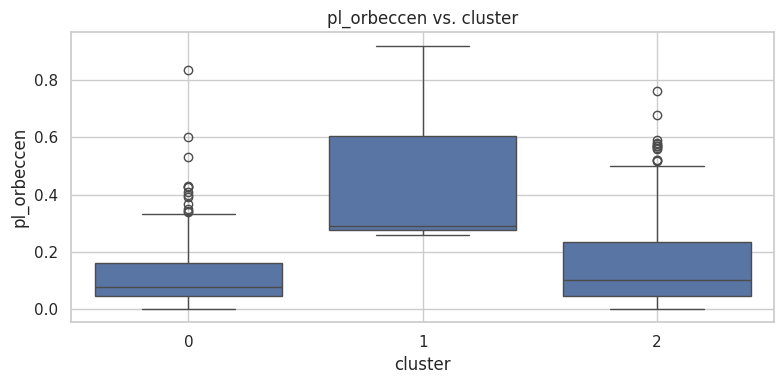

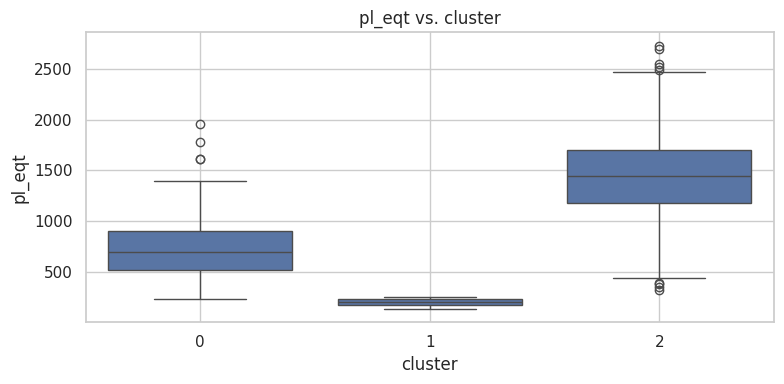

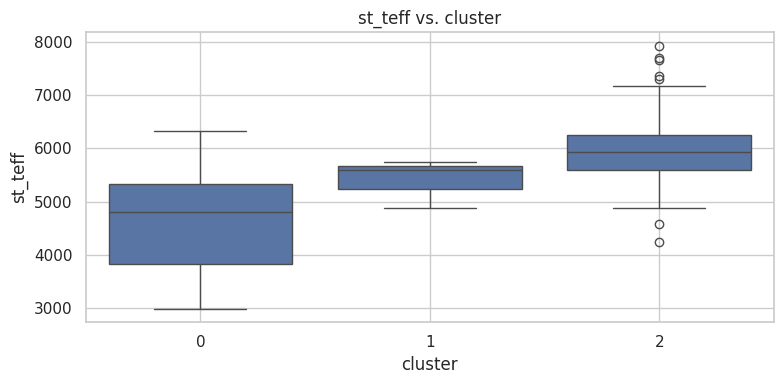

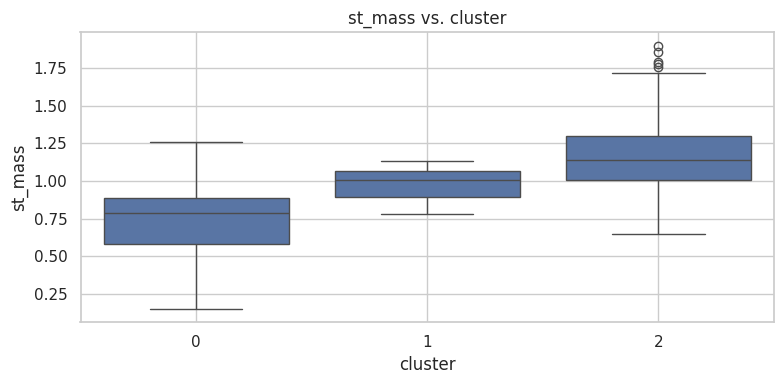

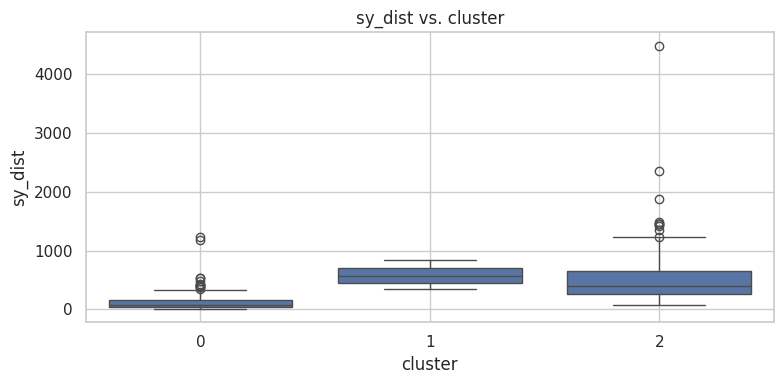

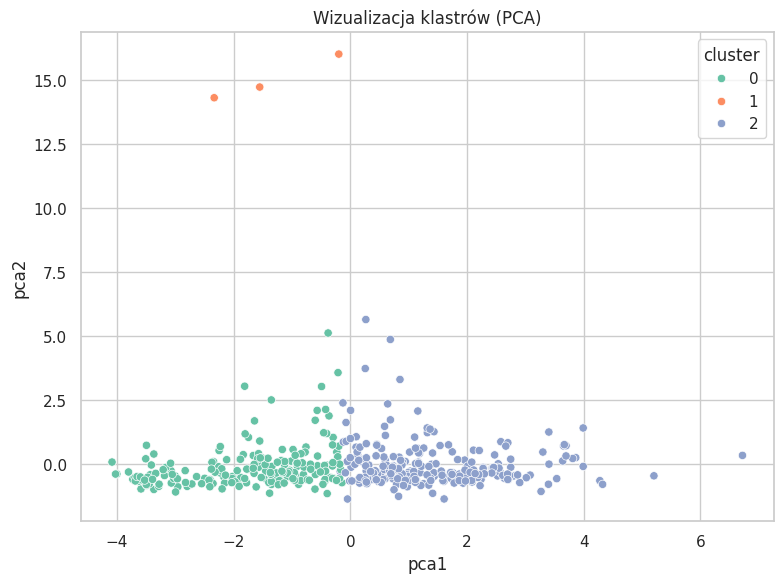

cluster
2    245
0    204
1      3
Name: count, dtype: int64


In [68]:
import seaborn as sns
from sklearn.decomposition import PCA
import seaborn as sns

clusters = 3
kmeans_final = KMeans(n_clusters=clusters, random_state=42)
data_cleaned['cluster'] = kmeans_final.fit_predict(X_scaled)
cluster_summary = data_cleaned.groupby('cluster')[numeric_cols].mean()

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='cluster', y=col, data=data_cleaned)
    plt.title(f'{col} vs. cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
data_cleaned['pca1'] = pca_result[:, 0]
data_cleaned['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_cleaned, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Wizualizacja klastrów (PCA)')
plt.grid(True)
plt.tight_layout()
plt.show()

print(data_cleaned['cluster'].value_counts())

Na wykresie wyraźnie widać podział punktów na 3 klastry.

Opcja z trzema klastrami na oko jest jak najbardziej w porządku. Ponieważ punkty pomarańczowe są najdalej położone. Również zielony i fioletowy są podzielone - co jest logiczne, ponieważ widoczne są odbiegające punkty w granicach 4-6 PCA1, które wręcz proszą się o podzielenie tych klas na dwie, jak i jest to zrobione.

Co do analizy tego, co jest wewnątrz klastrów - wypisana jest poniżej statystyka ze średnimi danymi dla każdego z klastrów - czyli średnia masa planety w klastrze, czy promień itd.:



In [69]:
print(cluster_summary) # Dla każdej grupy obliczane są średnie wartości
                       # wszystkich cech numerycznych (np. średni promień
                       # planet w klastrze, średnią masę itd.)

           pl_orbper  pl_orbsmax    pl_rade    pl_masse  pl_orbeccen  \
cluster                                                                
0          17.356014    0.103060   4.506887   92.550999     0.121216   
1        1035.982923    1.978667  10.429667  600.695953     0.490000   
2          10.928558    0.081478  13.308065  634.052923     0.158516   

              pl_eqt      st_teff   st_mass     sy_dist  
cluster                                                  
0         726.848039  4670.201961  0.727157  127.426226  
1         198.000000  5409.000000  0.973333  581.826667  
2        1431.685714  5933.126531  1.174653  513.210013  



Widać, że każdy klaster posiada jakieś swoje konkretne maksima co do wartości danych. Na przykład w 1 klastrze pl_orbper, pl_orbsmax, sy_dist osiągają największą wartość, gdzieś wartości innych parametrów są średnie, a gdzieś indziej jak np. dla pl_eqt są najmniejsze.

Jest to dobry znak - klastry przechowują niezależne, odseparowane od siebie dane posiadające własne cechy - co wskazuje na dobrą nienadzorowaną klasyfikację.

## Klasteryzacja hierarchiczna
Z kolei skorzystałam z innego algorytmu - klasteryzacji hierarchicznej. Na początku zakłada się, że każdy punkt jest osobnym klastrem. W każdym kroku algorytmu łączymy dwa klastry, których odległość jest najmniejsza, w jedno skupienie. Operację powtarzamy, aż otrzymamy oczekiwaną liczbę klastrów.

Wybrałam już znaną liczbę klastrów z eksperymentu, który zrobiliśmy dla k-średnich - 3, więc tę samą wartość użyłam i tutaj.
Wczytałam standardowe dane, wyczyściłam, użyłam tylko kolumn numerycznych i standaryzowałam - wszystko bez zmian.

Następnie zastosowałam klasteryzację hierarchiczną. Z założenia chciałam zobaczyć, jak punkty się łączą w grupy - do dyspozycji mamy dendrogram, na którym naniosłam granicę decyzyjną pokazującą podział na 3 klastry.

Dodatkowo stworzyłam podobny wykres z wykorzystaniem PCA, aby zilustrować podział punktów - który okazał się identyczny do wcześniej opisanego wyniku otrzymanego poprzednim algorytmem. To również świadczy o skuteczności użytego algorytmu.

Liczba planet przed czyszczeniem: 778
Liczba planet po czyszczeniu: 452
             pl_name  pl_orbper  pl_orbsmax  pl_rade    pl_masse  pl_orbeccen  \
0           55 Cnc e   0.736544     0.01544    2.080     7.81000        0.061   
4         CoRoT-10 b  13.240600     0.10550   10.870   874.00000        0.530   
6         CoRoT-12 b   2.828042     0.04016   16.140   291.43800        0.070   
10        CoRoT-18 b   1.900069     0.02950   14.680  1102.82000        0.080   
11        CoRoT-19 b   3.897130     0.05180   14.460   352.78000        0.047   
..               ...        ...         ...      ...         ...          ...   
769          WTS-1 b   3.352057     0.04700   16.700  1274.44000        0.100   
770  Wendelstein-1 b   2.663416     0.02820   11.561   188.15536        0.012   
771  Wendelstein-2 b   1.752224     0.02340   12.993   232.33373        0.057   
772       Wolf 503 b   6.001270     0.05706    2.043     6.26000        0.410   
775           XO-7 b   2.864142     0

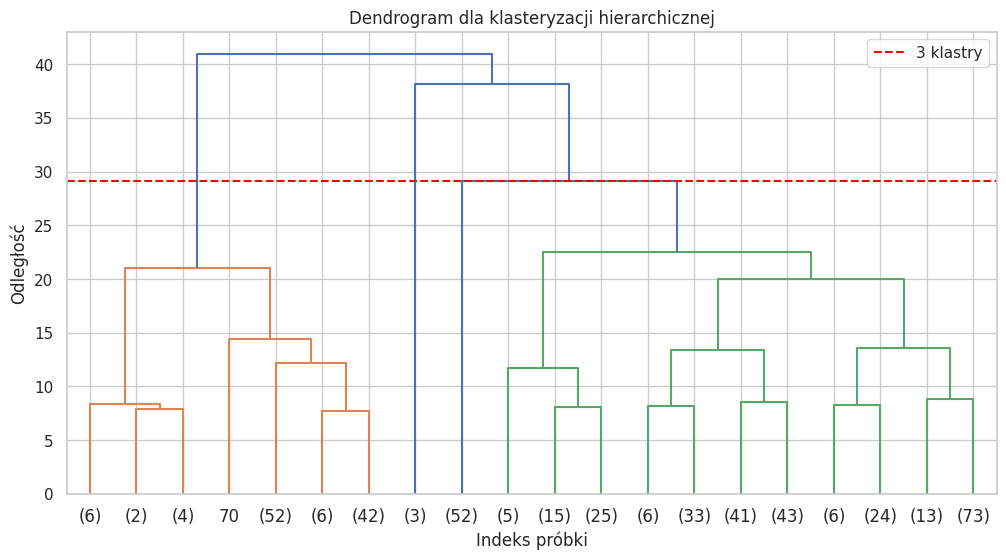

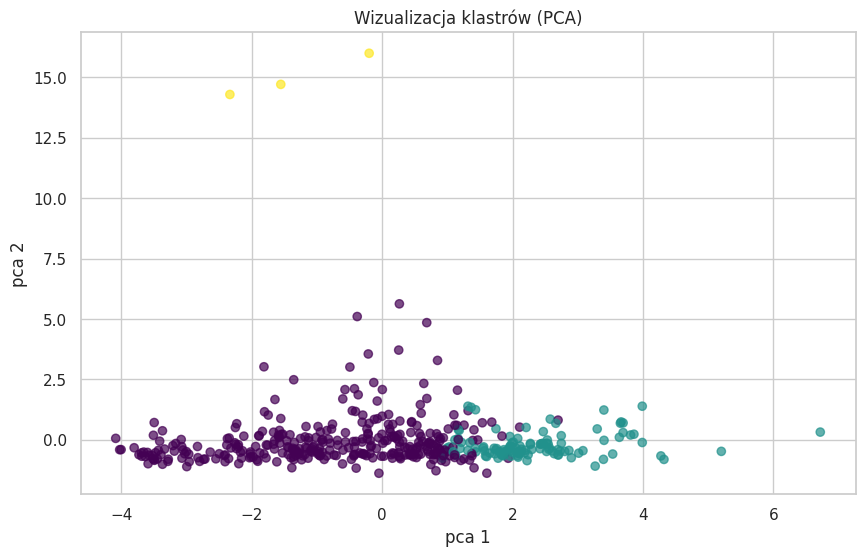

Średnie wartości cech w klastrach:
           pl_orbper  pl_orbsmax    pl_rade    pl_masse  pl_orbeccen  \
cluster                                                                
0          16.822744    0.102427   7.347033  209.635416     0.148434   
1           5.006031    0.058148  15.144053  918.459029     0.121157   
2        1035.982923    1.978667  10.429667  600.695953     0.490000   

              pl_eqt      st_teff   st_mass     sy_dist  
cluster                                                  
0         925.440476  5072.075000  0.861071  227.958118  
1        1664.530973  6213.451327  1.299204  664.933412  
2         198.000000  5409.000000  0.973333  581.826667  


In [78]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering


data = pd.read_csv('planets.csv')
data_cleaned = data.replace(0, np.nan).dropna()
print(f"Liczba planet przed czyszczeniem: {len(data)}")
data_cleaned = data.replace(0, np.nan).dropna()
print(f"Liczba planet po czyszczeniu: {len(data_cleaned)}")

print(data_cleaned)

# wybór tylko kolumn numerycznych do klasteryzacji
numeric_cols = ['pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_masse',
                'pl_orbeccen', 'pl_eqt', 'st_teff', 'st_mass', 'sy_dist']
X = data_cleaned[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# klasteryzacja hierarchiczna i dendrogram
plt.figure(figsize=(12, 6))
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.axhline(y=Z[-3, 2], c='red', linestyle='--', label='3 klastry')
plt.legend()
plt.title('Dendrogram dla klasteryzacji hierarchicznej')
plt.xlabel('Indeks próbki')
plt.ylabel('Odległość')
plt.show()

# wizualizacja klastrów z użyciem PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('Wizualizacja klastrów (PCA)')
plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.grid(True)
plt.show()

data_cleaned['cluster'] = cluster_labels
cluster_stats = data_cleaned.groupby('cluster')[numeric_cols].mean()
print("Średnie wartości cech w klastrach:")
print(cluster_stats)

# Zadanie 3
W zadaniu trzecim wykorzystałam algorytm fuzzy clustering, który zastosowałam dla zestawu danych z zadania 2. Zgodnie z wymaganiami, do uczenia wybrałam wyłącznie połowę dostępnych kolumn.

In [85]:
!pip install scikit-fuzzy

In [87]:
selected_cols = ['pl_orbper', 'pl_rade', 'pl_masse', 'st_teff', 'sy_dist']
X_selected = data_cleaned[selected_cols]
X_scaled_selected = scaler.fit_transform(X_selected)

Po zaimportowaniu biblioteki scikit-fuzzy, przetransponowałam dane, określiłam liczbę klastrów i uruchomiłam algorytm. Po zakończeniu obliczeń wygenerowałam metryki oceny jakości grupowania danych.

In [96]:
import skfuzzy as fuzz

# transponowanie danych
X_fcm = X_scaled_selected.T

# liczba klastrów
n_clusters = 3

# fuzzy c-means
# u: macierz przynależności (n_clusters x n_samples)
# cntr: centra klastrów
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_fcm, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)

cluster_labels = np.argmax(u, axis=0)
data_cleaned['fuzzy_cluster'] = cluster_labels

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
sil_score = silhouette_score(X_scaled_selected, cluster_labels)
db_score = davies_bouldin_score(X_scaled_selected, cluster_labels)
ch_score = calinski_harabasz_score(X_scaled_selected, cluster_labels)

print(f"Silhouette score: {sil_score:.3f}")
print(f"Davies-Bouldin index: {db_score:.3f}")
print(f"Calinski-Harabasz index: {ch_score:.3f}")

Silhouette score: 0.275
Davies-Bouldin index: 1.525
Calinski-Harabasz index: 142.844


Wartość współczynnika Silhouette dąży do jedynki - wynik jest satysfakcjonujący. Podobnie wskaźnik Daviesa-Bouldina osiąga wartość bliską zeru. Indeks Calińskiego-Harabasza (CHI) również charakteryzuje się wysoką wartością - wszystkie te metryki wskazują na prawidłowy podział danych.

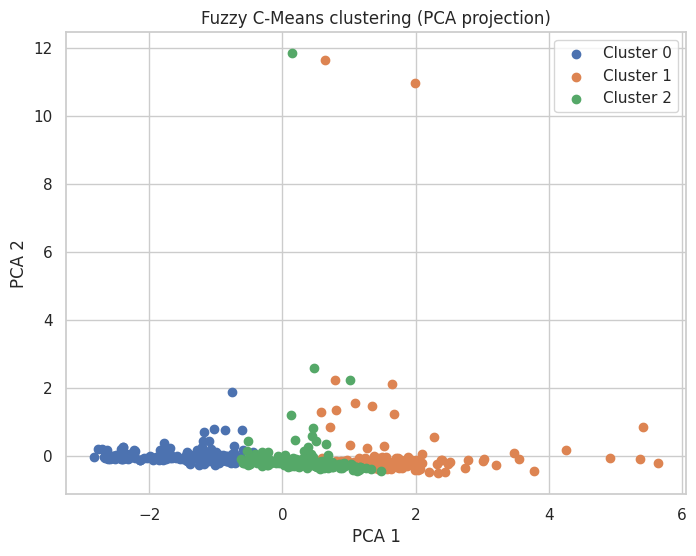

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_selected)

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X_pca[cluster_labels == i, 0],
                X_pca[cluster_labels == i, 1],
                label=f'Cluster {i}')
plt.title('Fuzzy C-Means clustering (PCA projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()


Widać, że dla rozmytej klasteryzacji otrzymaliśmy nieco inne wyniki niż dla klasteryzacji k-średnich czy hierarchicznej. Różnica jest widoczna w granicach - które w tym przypadku (zadanie 3) są rozmyte. Wynika to z faktu, że:

W "klasycznych" algorytmach klasteryzacji przynależność danego punktu do klastra można określić tylko jako:
  "0" - nie należy,
  "1" - należy

Oznacza to, że pomiędzy powstałymi klastrami można łatwo wyznaczyć wyraźną granicę.

W naszym przypadku nie mamy sytuacji, gdzie górne osobne punkty są w jednej grupie, a dolne dzielą się na pół. Tutaj mamy granice rozmyte, gdzie podziały między skupieniami mają nieostry charakter i bardziej przypominają podział na 3 pionowe części.

# Zadanie 4
Ostatnie zadanie brzmiało:
Dla zbioru danych circle.csv proszę, wykorzystując wszystkie (za wyjątkiem c-means) poznane do tej pory algorytmy klasteryzacyjne, podjąć kilka prób dopasowania jak najlepszego modelu, za każdym razem oceniając rozwiązanie z użyciem dedykowanych do tego metryk. Który z algorytmów najlepiej radzi sobie z takim układem danych i dlaczego? Proszę przedstawić wyniki również w formie odpowiednich wizualizacji.

K-means:
Silhouette: 0.352, Davies-Bouldin: 1.189, Calinski-Harabasz: 571.632

Klasteryzacja Hierarchiczna:
Silhouette: 0.338, Davies-Bouldin: 1.217, Calinski-Harabasz: 532.609

DBSCAN:
Silhouette: 0.114, Davies-Bouldin: 170.760, Calinski-Harabasz: 0.031


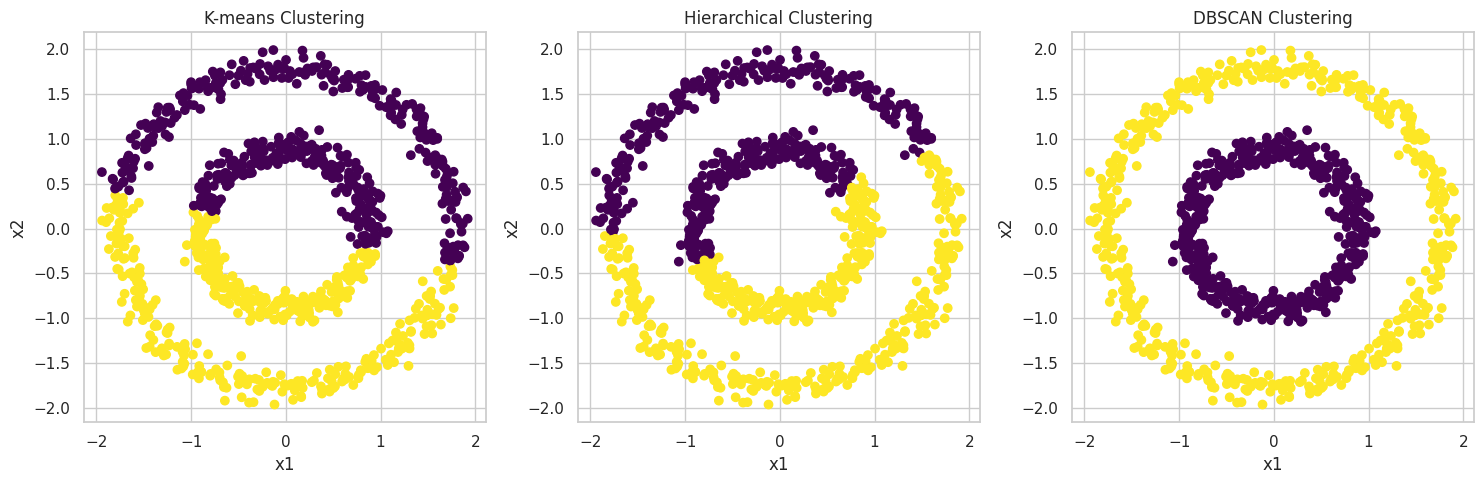

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.decomposition import PCA

# wczytanie danych
data = pd.read_csv('circle.csv')

# przygotowanie danych
X = data[['x1', 'x2']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# funckja dla obliczenia metryk
def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    return silhouette, davies_bouldin, calinski_harabasz

# 1. K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 2. Klasteryzacja hierarchiczna
linked = linkage(X_scaled, method='ward')
hierarchical_labels = fcluster(linked, t=2, criterion='maxclust')

# 3. DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

kmeans_metrics = evaluate_clustering(X_scaled, kmeans_labels)
hierarchical_metrics = evaluate_clustering(X_scaled, hierarchical_labels)
dbscan_metrics = evaluate_clustering(X_scaled, dbscan_labels)

print("K-means:")
print(f"Silhouette: {kmeans_metrics[0]:.3f}, Davies-Bouldin: {kmeans_metrics[1]:.3f}, Calinski-Harabasz: {kmeans_metrics[2]:.3f}")
print("\nKlasteryzacja Hierarchiczna:")
print(f"Silhouette: {hierarchical_metrics[0]:.3f}, Davies-Bouldin: {hierarchical_metrics[1]:.3f}, Calinski-Harabasz: {hierarchical_metrics[2]:.3f}")
print("\nDBSCAN:")
print(f"Silhouette: {dbscan_metrics[0]:.3f}, Davies-Bouldin: {dbscan_metrics[1]:.3f}, Calinski-Harabasz: {dbscan_metrics[2]:.3f}")


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# K-means
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
axes[0].set_title("K-means Clustering")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")

# Klasteryzacja hierarchiczna
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
axes[1].set_title("Hierarchical Clustering")
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x2")

# DBSCAN
axes[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
axes[2].set_title("DBSCAN Clustering")
axes[2].set_xlabel("x1")
axes[2].set_ylabel("x2")

plt.tight_layout()
plt.show()


Dla DBSCAN nie musimy podawać liczby klastrów – model sam się tym zajmuje. Wystarczy jedynie wskazać dwa parametry: eps oraz min_samples.

Jeśli chodzi o jego wyniki dla metryk, to są one dość słabe dla Davies-Bouldin:
 170.760 – może to wynikać ze struktury danych, w których występują gęste i nieregularne grupy. CHI również wypada słabo, prawdopodobnie z podobnych powodów.


W przypadku pozostałych algorytmów metryki są jak najbardziej w porządku.



---


Jeśli chodzi o wykresy – ocena ich jakości jest dość subiektywna, bo wszystko zależy od zadania i tego, co tak naprawdę chcemy osiągnąć.


Dla trzeciego wykresu mamy perfekcyjnie wykryte dwa koncentryczne klastry – co jest całkowicie logiczne w przypadku algorytmu, który grupuje punkty na podstawie ich zagęszczenia. Mamy więc jedno fioletowe "kółko" i kolejny obszar zagęszczenia oznaczony na żółto.


W przypadku pierwszego i drugiego wykresu sytuacja wygląda nieco inaczej, a wyniki są dość podobne. K-means próbuje znaleźć k klastrów jako „okręgi wokół centroidów” – tutaj widoczny jest podział na połowy.



---


Każdy z wyników, moim zdanien, jest poprawny – bo to jedynie kwestia celu zadania.

Na przykład, jeśli celem jest podział danych na grupy o podobnej odległości od centrum, to K-means będzie idealny.

Z kolei DBSCAN świetnie się sprawdzi w sytuacjach, gdy dane są przestrzenne lub geometryczne – np.:
przy wykrywaniu granicy między strefą centrum a obrzeżami miasta,
czy też w analizie wnętrza i zewnętrznego pierścienia jakiegoś obiektu.